# C4.5 Decision Tree Visualization

This notebook visualizes the trained C4.5-style Decision Tree model for tech career recommendations.

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from joblib import load, dump
import os

# Set up matplotlib for inline display
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.dpi'] = 100

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 1. Load Training Data

In [2]:
# Load the training dataset
DATA_PATH = "data/training_data.csv"

if not os.path.exists(DATA_PATH):
    print("❌ Training data not found! Run build_training_dataset.py first.")
else:
    df = pd.read_csv(DATA_PATH)
    print(f"✅ Loaded {len(df)} training records")
    print(f"\nDataset shape: {df.shape}")
    print(f"\nColumns: {df.columns.tolist()[:10]}...")  # Show first 10 columns
    print(f"\nFirst few rows:")
    display(df.head())

✅ Loaded 800 training records

Dataset shape: (800, 71)

Columns: ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']...

First few rows:


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q62,Q63,Q64,Q65,Q66,Q67,Q68,Q69,Q70,tech_field_id
0,3,2,2,3,3,4,1,0,5,2,...,2,2,3,1,1,1,3,2,3,7
1,2,2,3,2,2,5,1,1,1,0,...,2,4,2,1,1,3,3,1,5,5
2,1,1,2,2,3,2,2,0,3,1,...,2,3,0,1,3,0,3,3,2,7
3,5,2,5,3,0,4,2,3,1,3,...,1,1,0,1,1,3,0,4,4,3
4,5,0,2,2,2,3,0,2,5,3,...,3,2,3,0,5,2,2,3,1,9


## 2. Check Class Distribution

Tech Field Distribution:
tech_field_id
7     82
5     82
11    79
3     78
6     74
10    72
8     70
2     67
4     67
9     66
1     63
Name: count, dtype: int64


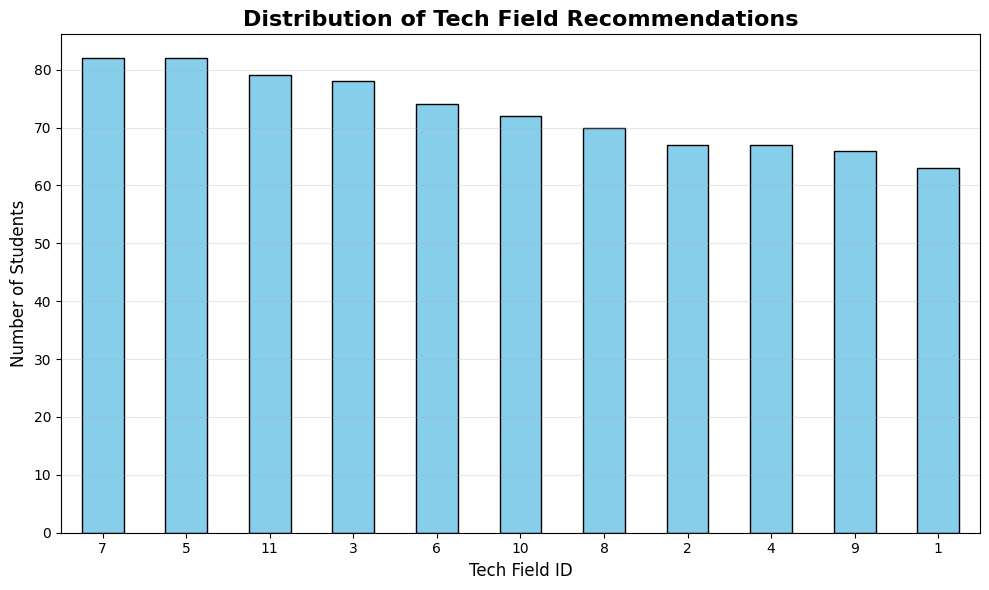

In [13]:
# Check the distribution of tech fields
if 'tech_field_id' in df.columns:
    class_counts = df['tech_field_id'].value_counts()
    print("Tech Field Distribution:")
    print(class_counts)
    
    # Plot distribution
    plt.figure(figsize=(10, 6))
    class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Distribution of Tech Field Recommendations', fontsize=16, fontweight='bold')
    plt.xlabel('Tech Field ID', fontsize=12)
    plt.ylabel('Number of Students', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("❌ 'tech_field_id' column not found!")

## 3. Train C4.5-Style Decision Tree

In [3]:
# Prepare features and target
X = df.drop('tech_field_id', axis=1)
y = df['tech_field_id']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Train C4.5-style Decision Tree with entropy
clf = DecisionTreeClassifier(
    criterion='entropy',        # Information Gain (C4.5's method)
    max_depth=15,              # Prevent overfitting
    min_samples_split=5,       # Min samples to split node
    min_samples_leaf=2,        # Min samples in leaf node
    random_state=42
)

print("\n🌳 Training C4.5-style Decision Tree...")
clf.fit(X, y)
print("✅ Training complete!")

# Display tree statistics
print(f"\n📊 Tree Statistics:")
print(f"  - Number of nodes: {clf.tree_.node_count}")
print(f"  - Number of leaves: {clf.tree_.n_leaves}")
print(f"  - Max depth: {clf.tree_.max_depth}")
print(f"  - Number of features: {clf.n_features_in_}")
print(f"  - Number of classes: {len(clf.classes_)}")

Features shape: (800, 70)
Target shape: (800,)

🌳 Training C4.5-style Decision Tree...
✅ Training complete!

📊 Tree Statistics:
  - Number of nodes: 257
  - Number of leaves: 129
  - Max depth: 11
  - Number of features: 70
  - Number of classes: 11


## 4. Visualize the Decision Tree (Full View)

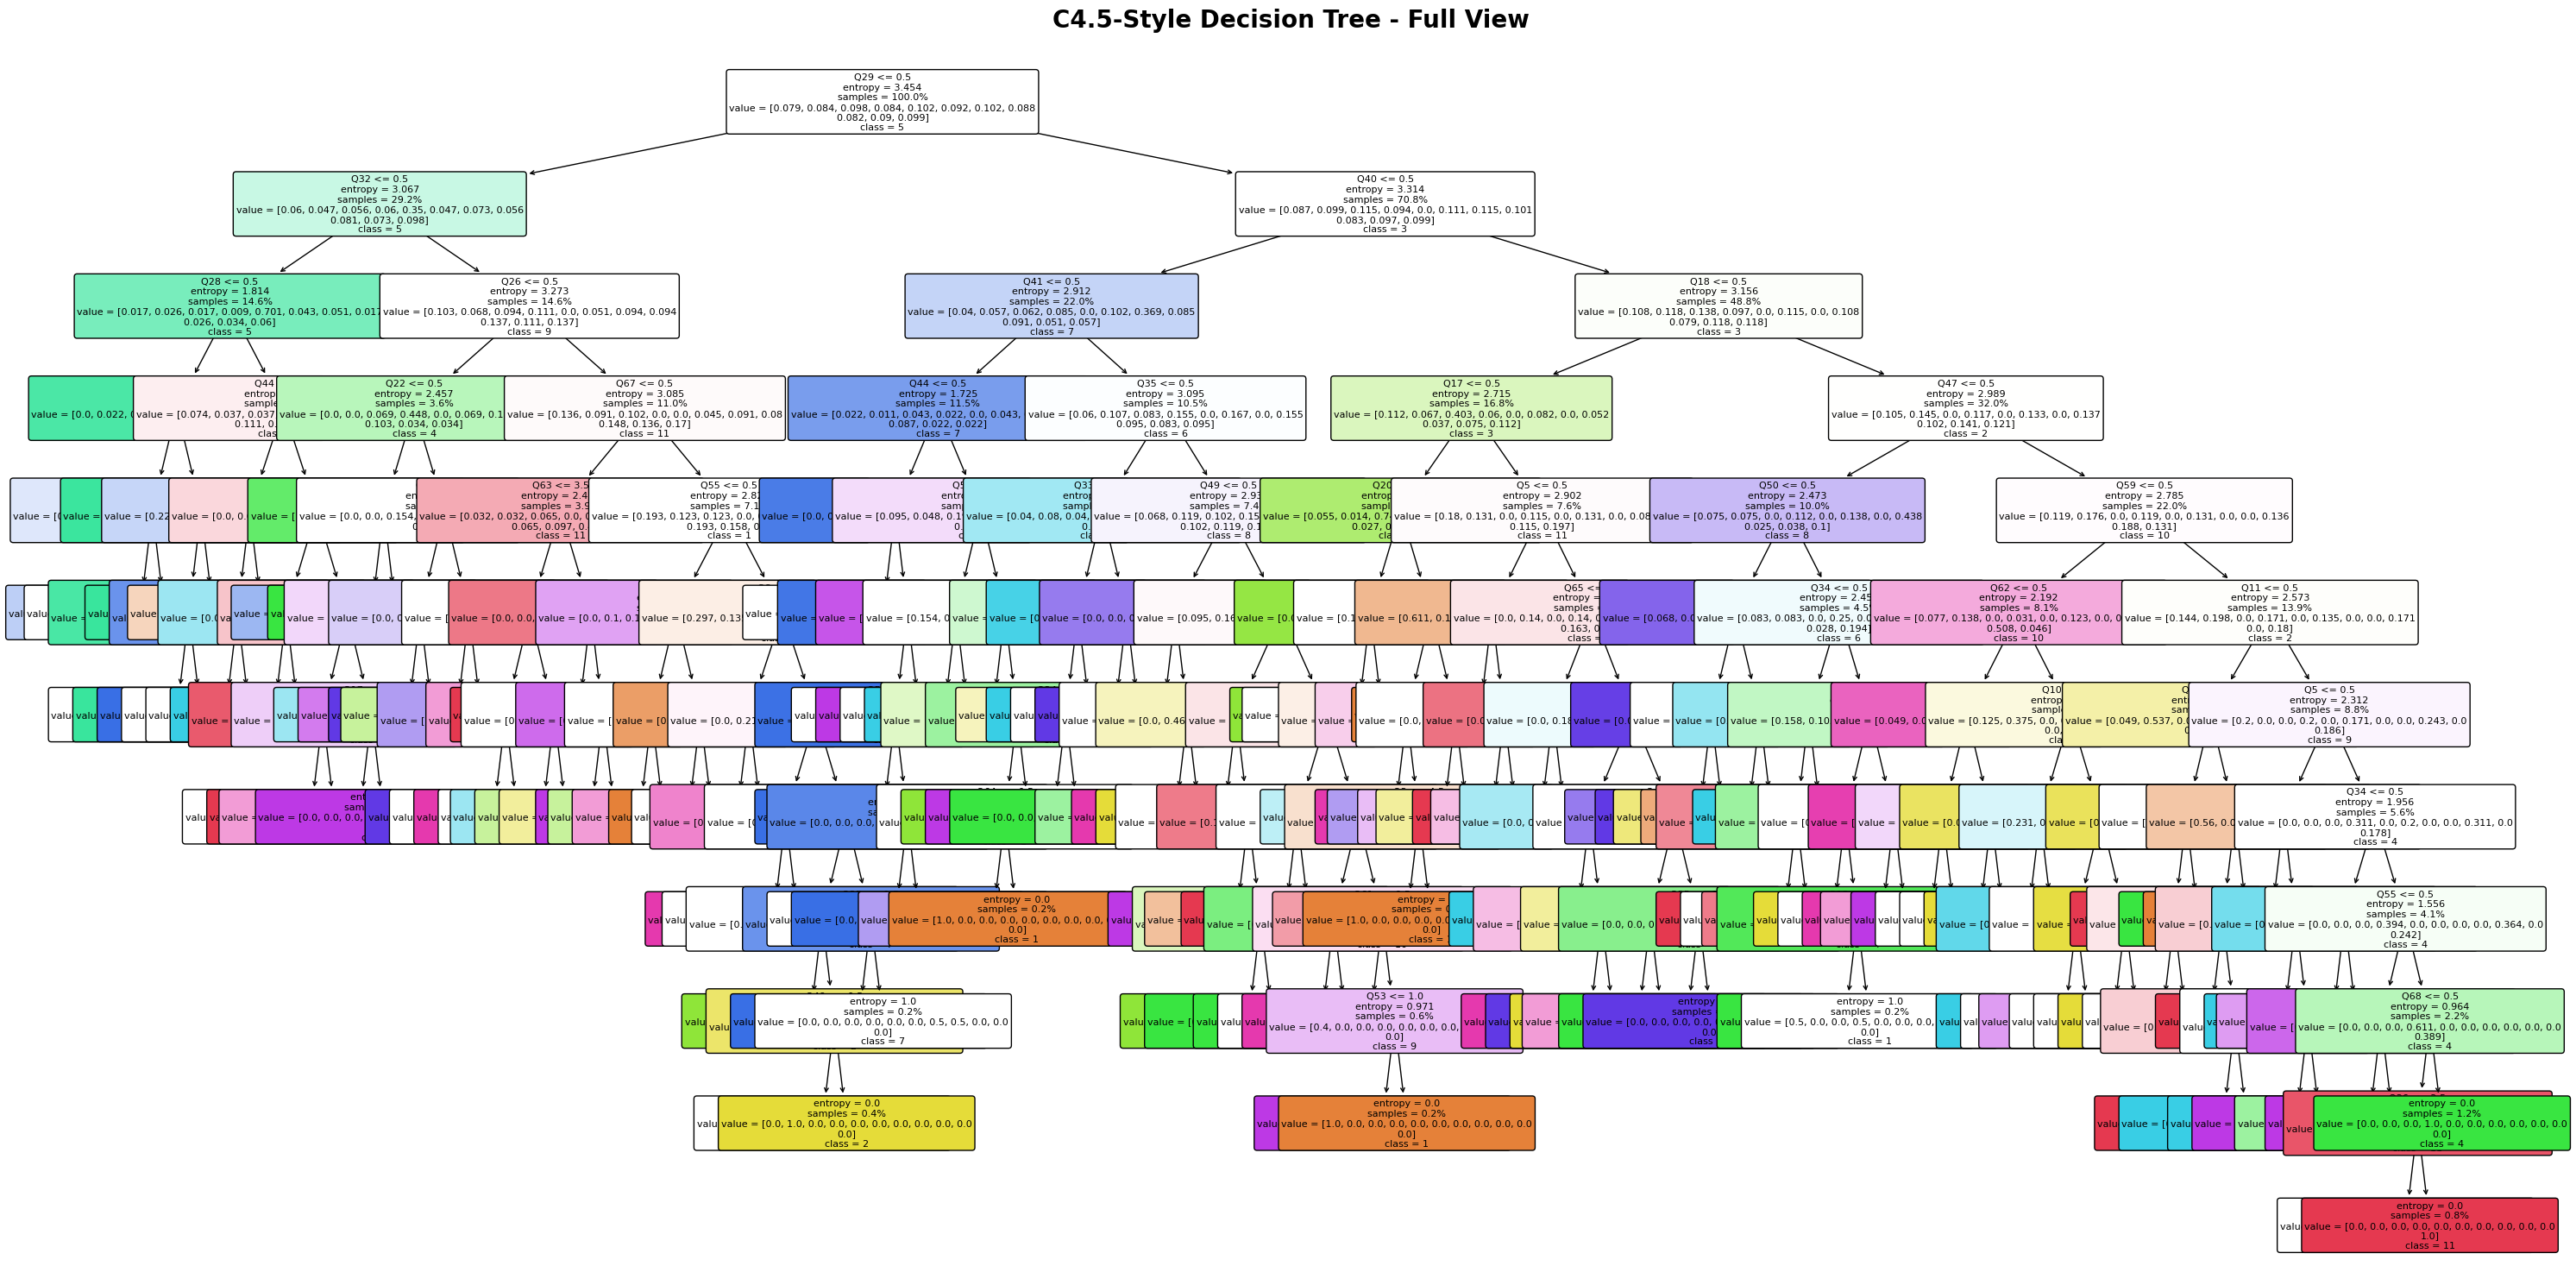


💡 Tip: Zoom in to see individual nodes clearly!


In [4]:
# Create a large visualization of the full tree
plt.figure(figsize=(30, 15))

plot_tree(
    clf, 
    filled=True,                          # Color nodes by majority class
    feature_names=list(X.columns),        # Show feature names (Q1, Q2, etc.)
    class_names=[str(c) for c in clf.classes_],  # Show class names
    rounded=True,                         # Rounded boxes
    fontsize=8,                          # Font size
    proportion=True                       # Show proportions instead of counts
)

plt.title('C4.5-Style Decision Tree - Full View', fontsize=20, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💡 Tip: Zoom in to see individual nodes clearly!")

## 5. Visualize Top Levels Only (Simplified View)

In [5]:
# Train a shallow tree for better visualization
clf_shallow = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,  # Only 4 levels deep
    min_samples_split=5,
    random_state=42
)

clf_shallow.fit(X, y)

# Visualize
plt.figure(figsize=(25, 12))

plot_tree(
    clf_shallow, 
    filled=True,
    feature_names=X.columns,
    class_names=[str(c) for c in clf_shallow.classes_],
    rounded=True,
    fontsize=10,
    proportion=True
)

plt.title('C4.5-Style Decision Tree - Top 4 Levels (Simplified)', fontsize=20, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n📝 This simplified view shows only the top decision-making rules.")

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51',
       'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60', 'Q61',
       'Q62', 'Q63', 'Q64', 'Q65', 'Q66', 'Q67', 'Q68', 'Q69', 'Q70'],
      dtype='object') instead.

<Figure size 2500x1200 with 0 Axes>

## 6. Export Tree Rules as Text

In [6]:
# Export the decision rules as text
tree_rules = export_text(clf, feature_names=list(X.columns), max_depth=5)

print("🌳 Decision Tree Rules (Top 5 Levels):")
print("=" * 80)
print(tree_rules)
print("=" * 80)

🌳 Decision Tree Rules (Top 5 Levels):
|--- Q29 <= 0.50
|   |--- Q32 <= 0.50
|   |   |--- Q28 <= 0.50
|   |   |   |--- Q30 <= 3.50
|   |   |   |   |--- Q62 <= 1.50
|   |   |   |   |   |--- class: 7
|   |   |   |   |--- Q62 >  1.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- Q30 >  3.50
|   |   |   |   |--- Q55 <= 0.50
|   |   |   |   |   |--- Q50 <= 0.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Q50 >  0.50
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |--- Q55 >  0.50
|   |   |   |   |   |--- class: 5
|   |   |--- Q28 >  0.50
|   |   |   |--- Q44 <= 0.50
|   |   |   |   |--- Q67 <= 1.50
|   |   |   |   |   |--- Q22 <= 2.50
|   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |--- Q22 >  2.50
|   |   |   |   |   |   |--- class: 7
|   |   |   |   |--- Q67 >  1.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Q44 >  0.50
|   |   |   |   |--- Q37 <= 0.50
|   |   |   |   |   |--- Q11 <= 0.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   

## 7. Feature Importance Analysis


📊 Top 20 Most Important Questions:
   feature  importance
28     Q29    0.065786
39     Q40    0.059096
31     Q32    0.047531
46     Q47    0.039576
17     Q18    0.039441
40     Q41    0.036368
43     Q44    0.032777
54     Q55    0.032535
16     Q17    0.030241
58     Q59    0.029911
9      Q10    0.029835
4       Q5    0.027579
33     Q34    0.027517
27     Q28    0.027123
49     Q50    0.024595
36     Q37    0.024392
63     Q64    0.022998
61     Q62    0.022484
10     Q11    0.021231
19     Q20    0.019970


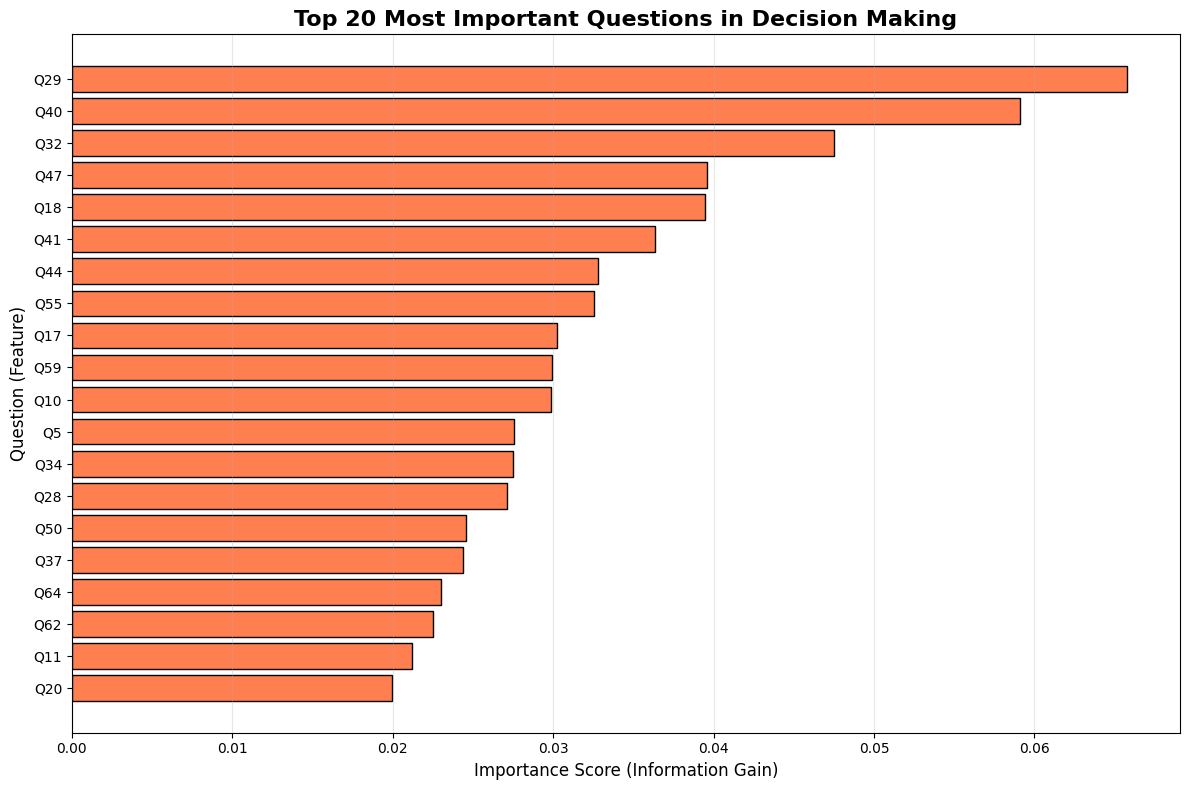

In [7]:
# Get feature importances
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False)

print("\n📊 Top 20 Most Important Questions:")
print(feature_importance.head(20))

# Plot top 20 features
plt.figure(figsize=(12, 8))
top_20 = feature_importance.head(20)
plt.barh(top_20['feature'], top_20['importance'], color='coral', edgecolor='black')
plt.xlabel('Importance Score (Information Gain)', fontsize=12)
plt.ylabel('Question (Feature)', fontsize=12)
plt.title('Top 20 Most Important Questions in Decision Making', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  # Highest importance at top
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Test Prediction with Sample Data


🎯 Sample Student Prediction:
  Predicted Tech Field ID: 7

  Probability Distribution:
    Tech Field 1: 0.00%
    Tech Field 2: 0.00%
    Tech Field 3: 0.00%
    Tech Field 4: 0.00%
    Tech Field 5: 0.00%
    Tech Field 6: 0.00%
    Tech Field 7: 100.00%
    Tech Field 8: 0.00%
    Tech Field 9: 0.00%
    Tech Field 10: 0.00%
    Tech Field 11: 0.00%


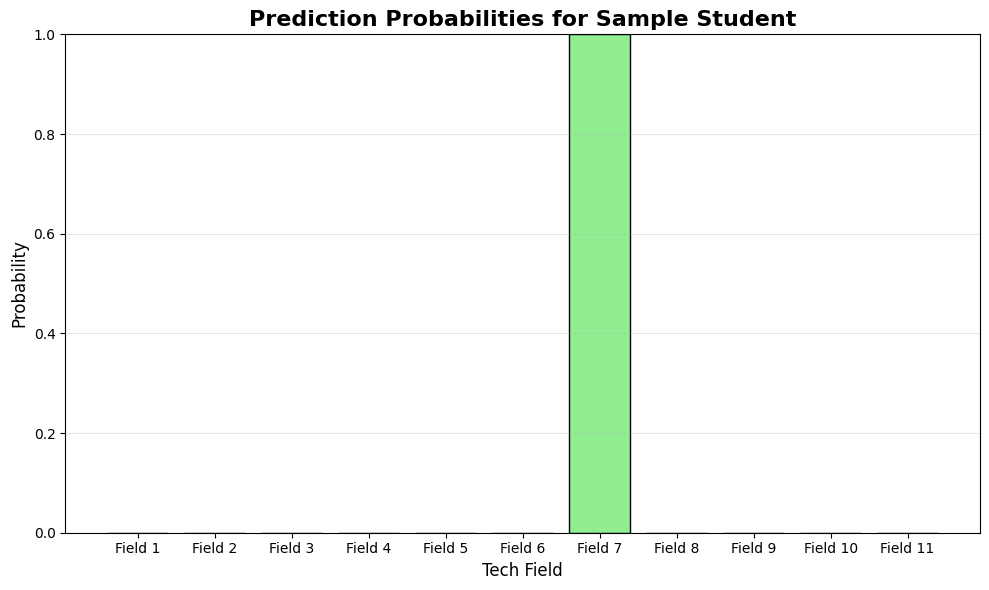

In [8]:
# Sample student responses (70 features)
sample_features = [
    3, 2, 2, 3, 3, 4, 1, 0, 5, 2,
    3, 3, 5, 0, 5, 1, 3, 0, 5, 1,
    1, 0, 3, 2, 2, 0, 2, 0, 3, 5,
    0, 1, 5, 3, 3, 4, 1, 2, 4, 0,
    0, 4, 0, 0, 5, 1, 1, 1, 0, 0,
    3, 1, 0, 2, 1, 3, 3, 1, 2, 2,
    0, 2, 2, 3, 1, 1, 1, 3, 2, 3
]

# Make prediction
sample_df = pd.DataFrame([sample_features], columns=X.columns)
prediction = clf.predict(sample_df)[0]
probabilities = clf.predict_proba(sample_df)[0]

print("\n🎯 Sample Student Prediction:")
print(f"  Predicted Tech Field ID: {prediction}")
print(f"\n  Probability Distribution:")

for class_id, prob in zip(clf.classes_, probabilities):
    print(f"    Tech Field {class_id}: {prob*100:.2f}%")

# Visualize probabilities
plt.figure(figsize=(10, 6))
plt.bar([f"Field {c}" for c in clf.classes_], probabilities, color='lightgreen', edgecolor='black')
plt.xlabel('Tech Field', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Prediction Probabilities for Sample Student', fontsize=16, fontweight='bold')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Save the Model

In [10]:
# Save the trained model
MODEL_PATH = "model.pkl"
dump(clf, MODEL_PATH)
print(f"\n✅ Model saved to {MODEL_PATH}")

# Save tree visualization as PNG
plt.figure(figsize=(30, 15))
plot_tree(
    clf, 
    filled=True,
    feature_names=X.columns,
    class_names=[str(c) for c in clf.classes_],
    rounded=True,
    fontsize=8,
    proportion=True
)
plt.title('C4.5-Style Decision Tree', fontsize=20, fontweight='bold', pad=20)
plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')
plt.close()
print(f"✅ Tree visualization saved to decision_tree.png")


✅ Model saved to model.pkl


InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51',
       'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60', 'Q61',
       'Q62', 'Q63', 'Q64', 'Q65', 'Q66', 'Q67', 'Q68', 'Q69', 'Q70'],
      dtype='object') instead.

<Figure size 3000x1500 with 0 Axes>